# Training and Validating Bug Prediction Models Assignment 


Below are the required imports

In [522]:
# dataset operations (panda dataframes) 
import pandas as pd

# preprocessing (binarizer)
from sklearn import preprocessing

#data balancing
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# accuracy metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef
from matplotlib import pyplot
from sklearn.metrics import roc_curve

# feature selection 
from sklearn.datasets import load_digits
from mlxtend.feature_selection import ExhaustiveFeatureSelector 
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile, chi2

# single classifiers
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# ensemble classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# 1 Read in CSV data and preprocess

## 1.1 Reading in the csv file data with pandas into a dataframe


In [523]:
data = pd.read_csv("./datasets/ant-1.7.csv")

## 1.2 Binarize the bug column
Binarize the 'bug' column - '0' for **No-bug** and '1' for **bug**.

In [524]:
binarizer = preprocessing.Binarizer()
data['bug'] = binarizer.transform(data['bug'].values.reshape(-1,1))

Separate the features (x) from the target column (y). Also, remove non-numeric fields that do not help in prediction. Note: Some data balancers do not accept non-numeric fields.
The data description helps us see the counts of each column, the variance and the mean.

In [525]:
x = data.drop(['name','version','name.1','bug'], axis=1)
y = data['bug']
data = data.drop(['name','version','name.1'], axis=1)
print("preprocessed data overview:")
print(data.describe())

preprocessed data overview:
              wmc         dit         noc         cbo         rfc  \
count  745.000000  745.000000  745.000000  745.000000  745.000000   
mean    11.071141    2.522148    0.731544   11.046980   34.362416   
std     11.975963    1.398869    4.800357   26.343149   36.024972   
min      0.000000    1.000000    0.000000    0.000000    0.000000   
25%      4.000000    1.000000    0.000000    4.000000   11.000000   
50%      7.000000    2.000000    0.000000    6.000000   23.000000   
75%     14.000000    4.000000    0.000000   11.000000   43.000000   
max    120.000000    7.000000  102.000000  499.000000  288.000000   

              lcom          ca          ce         npm       lcom3  \
count   745.000000  745.000000  745.000000  745.000000  745.000000   
mean     89.147651    5.655034    5.746309    8.365101    1.013342   
std     349.937555   25.814223    5.653176    9.331319    0.619015   
min       0.000000    0.000000    0.000000    0.000000    0.000000   


# 2 Data balancing



## 2.1 Oversampling

Use the oversampler to balance the data. *"The strategy is to generate new samples by randomly sampling with replacement the current available samples"*. ***"In addition, RandomOverSampler allows to sample heterogeneous data (e.g. containing some strings)"***

In [526]:
ros = RandomOverSampler(random_state=0)
X_oversampled, y_oversampled = ros.fit_resample(x, y)
print('Oversampled_X.shape: {0}'.format(X_oversampled.shape))

Oversampled_X.shape: (1158, 20)


## 2.2 Undersampling
Use the undersampler  to balance the data. "*RandomUnderSampler is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes*":

In [527]:
rus = RandomUnderSampler(random_state=0)
X_undersampled, y_undersampled = rus.fit_resample(x, y)
print('X_undersampled.shape: {0}'.format(X_undersampled.shape))

X_undersampled.shape: (332, 20)


## 2.3 SMOTE
Use synthetic Minority Oversampling Technique (SMOTE) and indicate the categorical columns

In [528]:
smote_nc = SMOTENC(categorical_features=[0,1, 2], random_state=0)
X_smotec, y_smotec = SMOTE().fit_resample(x, y)
print('X_smotec.shape: {0}'.format(X_smotec.shape))

X_smotec.shape: (1158, 20)


**Compare the above sampling techniques using logistic regression(see section 5.1)**

  original_data confusion matrix:
     True Negative: 546
     False Positive: 100
     False Negative: 33
     True Positive: 66


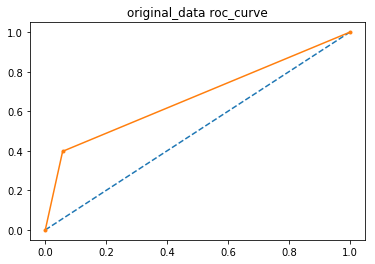

  oversampled confusion matrix:
     True Negative: 456
     False Positive: 177
     False Negative: 123
     True Positive: 402


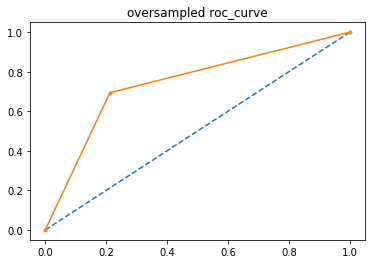

  smotec confusion matrix:
     True Negative: 466
     False Positive: 176
     False Negative: 113
     True Positive: 403


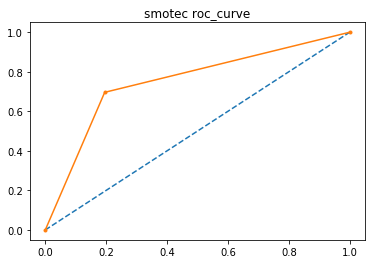

  undersampled confusion matrix:
     True Negative: 127
     False Positive: 53
     False Negative: 39
     True Positive: 113


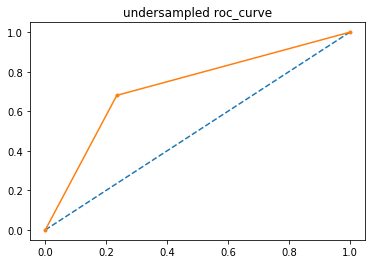

  Data_balancersAccuracy Metrics:
-------
{'original_data': {'accuracy': 0.8214765100671141, 'recall': 0.6666666666666666, 'f_score': 0.4981132075471698, 'precision': 0.39759036144578314, 'roc_auc_score': 0.7559339525283797, 'matthews_corrcoef': 0.4175403297420367}}
-------
{'oversampled': {'accuracy': 0.7409326424870466, 'recall': 0.7657142857142857, 'f_score': 0.7282608695652173, 'precision': 0.694300518134715, 'roc_auc_score': 0.7430467163168584, 'matthews_corrcoef': 0.4839747415310858}}
-------
{'smotec': {'accuracy': 0.7504317789291882, 'recall': 0.7810077519379846, 'f_score': 0.7360730593607305, 'precision': 0.696027633851468, 'roc_auc_score': 0.7534322248786496, 'matthews_corrcoef': 0.5038550700919553}}
-------
{'undersampled': {'accuracy': 0.7228915662650602, 'recall': 0.743421052631579, 'f_score': 0.7106918238993711, 'precision': 0.6807228915662651, 'roc_auc_score': 0.7244883040935672, 'matthews_corrcoef': 0.44737702090117387}}
----------
  smotec has the best matthews_corrcoe

In [529]:
#Collect all the sampled datasets into a dictionary
data_set_dict = {"original": (x,y),
                 "oversampled": (X_oversampled, y_oversampled),
                 "undersampled": (X_undersampled, y_undersampled),
                 "smotec": (X_smotec, y_smotec)}

original_data=logistic_regression_evalution("original_data", x, y)
oversampled = logistic_regression_evalution("oversampled",X_oversampled,y_oversampled)  
smotec = logistic_regression_evalution("smotec", X_smotec, y_smotec) 
undersampled = logistic_regression_evalution("undersampled", X_undersampled, y_undersampled) 
# Select the best feature data balancing sampling technique
best_sample_data = get_best_accuracy_metrics([original_data,oversampled,smotec,undersampled],
                                             "Data_balancers","matthews_corrcoef")
(X_balanced,y_balanced)= data_set_dict[best_sample_data]

# 3 Feature selection
In this task we aim to select the features that most influence the classification outcome. We aim to remove covariant features to reduce overfitting and the training cost.

## 3.1 Removing features with low variance

*Remove all features that have the same value in more than 80% of the samples. Boolean features are Bernoulli random variables, and the variance of such variables is given by **p*(1-p)**. We therefore give a threshhold on the least variance we want on the selected features to be **p*(1-p)**.*

In [530]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_low_variance = sel.fit_transform(X_balanced)
print('     X_low_variance.shape: {0}'.format(X_low_variance.shape))

     X_low_variance.shape: (1158, 17)


## 3.2 Univariate feature selection
*Univariate feature selection works by selecting the best features based on univariate statistical tests. SelectPercentile (a type of Univariate feature selection) removes all but a user-specified highest scoring percentage of features.* 

In [531]:
X_univariate = SelectPercentile(chi2, percentile=80).fit_transform(X_balanced, y_balanced)
print('     X_univariate.shape: {0}'.format(X_univariate.shape))

     X_univariate.shape: (1158, 16)


## 3.3 Exhaustive feature selection
*Implementation of an exhaustive feature selector for sampling and evaluating all possible feature combinations in a specified range.* In our case the minimum number of columns is 15 and the maximum is 20. That leads to a the creation and testing of C(20,15) sets.

In [532]:
lr = LogisticRegression(random_state=0, solver='lbfgs',max_iter = 50000,
                    multi_class='multinomial')
knn = KNeighborsClassifier(n_neighbors=3)
efs1  =    ExhaustiveFeatureSelector(lr, 
                                     min_features=15,
                                     max_features=20,
                                     scoring='f1',
                                     print_progress=False,
                                     cv=0, # no cross validation to save time 
                                     n_jobs= -1 ) # use all processors on the pc
X_exhaustive = efs1.fit_transform(X_balanced, y_balanced)
print('     X_exhaustive.shape: {0}'.format(X_exhaustive.shape))    

     X_exhaustive.shape: (1158, 15)


**Compare the above feature selection techniques using logistic regression(see section 5.1)**

  low_variance confusion matrix:
     True Negative: 474
     False Positive: 176
     False Negative: 105
     True Positive: 403


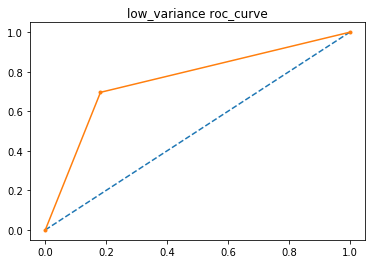

  univariate confusion matrix:
     True Negative: 466
     False Positive: 180
     False Negative: 113
     True Positive: 399


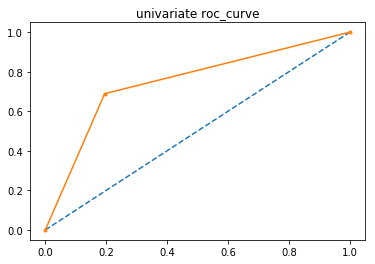

  exhaustive confusion matrix:
     True Negative: 474
     False Positive: 153
     False Negative: 105
     True Positive: 426


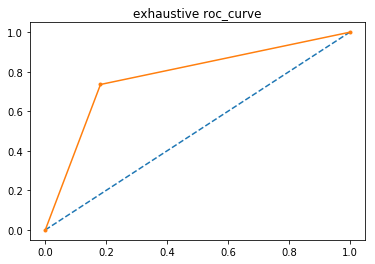

  Feature_selectorsAccuracy Metrics:
-------
{'low_variance': {'accuracy': 0.7573402417962003, 'recall': 0.7933070866141733, 'f_score': 0.7414903403863846, 'precision': 0.696027633851468, 'roc_auc_score': 0.7612689279224713, 'matthews_corrcoef': 0.5185942887668655}}
-------
{'univariate': {'accuracy': 0.7469775474956822, 'recall': 0.779296875, 'f_score': 0.7314390467461046, 'precision': 0.689119170984456, 'roc_auc_score': 0.7503295520510835, 'matthews_corrcoef': 0.4972958026417249}}
----------
  low_variance has the best matthews_corrcoef score: 0.5185942887668655


In [533]:
low_variance_feat_selection =  logistic_regression_evalution("low_variance", X_low_variance, y_balanced)
univariate_feat_selection = logistic_regression_evalution("univariate", X_univariate, y_balanced)
X_exhaustive_feat_selection = logistic_regression_evalution("exhaustive", X_exhaustive, y_balanced)
feature_selection_datasets = {
                                  "low_variance": (X_low_variance, y_balanced),
                                  "univariate": (X_univariate, y_balanced),
                                  "exhaustive": (X_univariate, y_balanced)
                            }
best_feat_data = get_best_accuracy_metrics([low_variance_feat_selection,univariate_feat_selection],
                                               "Feature_selectors","matthews_corrcoef")
(X_best_feature,y_best_feature)= feature_selection_datasets[best_feat_data]

# 4 Classification 


## 4.1  single classifiers

In [534]:
d_tree = tree.DecisionTreeClassifier()
l_regression = LogisticRegression(solver='lbfgs',max_iter=5000)
n_bayes = GaussianNB()
single_classifier_list = [("d_tree",d_tree),("l_regression",l_regression), ("n_bayes",n_bayes)] 

## 4.2 Ensemble Classifiers 

**4.2.1 Majority voting classifier**

*Each instance is predicted using the m models that return a confidence score ranging between 0 and 1.The scores are combined by an operator (e.g.,Average)*

In [535]:
eclf = VotingClassifier(estimators=[("d_tree",d_tree),("l_regression",l_regression), ("n_bayes",n_bayes)]
                            , voting='hard')
majority_voting_clf=[('ensemble_voting',eclf)]

**4.2.2 Bagging Classifier**

*M datasets with the same size as the original one are generated by performing sampling with replacement (Bootstrap) from the training set. Each dataset a model is trained using a weak classifier. The instances are predicted using the m models and the outcomes are combined using majority voting.*

In [536]:
bagging = BaggingClassifier(base_estimator=d_tree, n_estimators=10)
bagging_clf=[('ensemble_bagging',bagging)]

**4.2.3 Random Forest**

*Random Forest is an ensemble of pruned decision trees. Similarly to Bagging, each decision tree is built through bootstrapping.The instances are predicted using the built decision trees. The predictions are combined using majority voting.*

In [537]:
randomForest = RandomForestClassifier(n_estimators=10)
randomForest_clf= [('ensemble_randomForest',randomForest)]

**Compare the accuracy metrics of the above classifiers**
Ensemble classifiers are expected to have better accuracy metrics than single classifiers

d_tree Number of mislabeled points out of a total 1158 points : 186
d_treeconfusion_matrix:
  d_treeclassifier_accuracy_metrics:
     True Negative: 486
     False Positive: 93
     False Negative: 93
     True Positive: 486


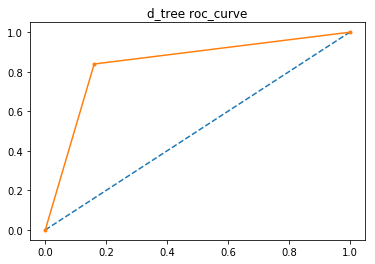

l_regression Number of mislabeled points out of a total 1158 points : 279
l_regressionconfusion_matrix:
  l_regressionclassifier_accuracy_metrics:
     True Negative: 475
     False Positive: 104
     False Negative: 175
     True Positive: 404


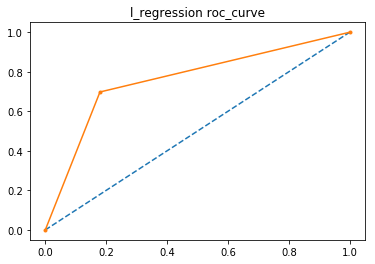

n_bayes Number of mislabeled points out of a total 1158 points : 321
n_bayesconfusion_matrix:
  n_bayesclassifier_accuracy_metrics:
     True Negative: 491
     False Positive: 88
     False Negative: 233
     True Positive: 346


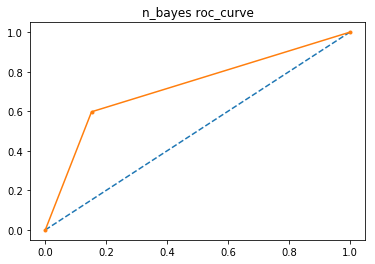

ensemble_voting Number of mislabeled points out of a total 1158 points : 264
ensemble_votingconfusion_matrix:
  ensemble_votingclassifier_accuracy_metrics:
     True Negative: 497
     False Positive: 82
     False Negative: 182
     True Positive: 397


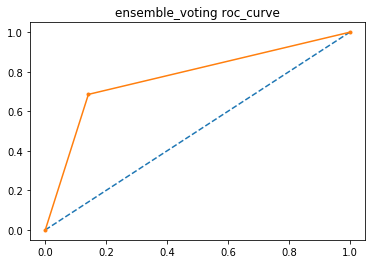

ensemble_bagging Number of mislabeled points out of a total 1158 points : 146
ensemble_baggingconfusion_matrix:
  ensemble_baggingclassifier_accuracy_metrics:
     True Negative: 510
     False Positive: 69
     False Negative: 77
     True Positive: 502


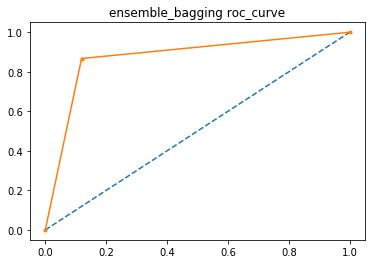

ensemble_randomForest Number of mislabeled points out of a total 1158 points : 144
ensemble_randomForestconfusion_matrix:
  ensemble_randomForestclassifier_accuracy_metrics:
     True Negative: 517
     False Positive: 62
     False Negative: 82
     True Positive: 497


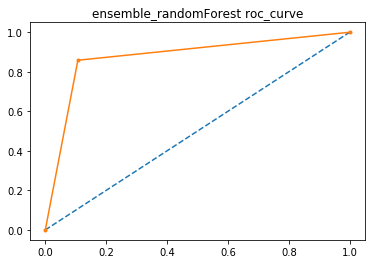

  Classifier MetricsAccuracy Metrics:
-------
{'d_tree': {'accuracy': 0.8393782383419689, 'recall': 0.8393782383419689, 'f_score': 0.8393782383419688, 'precision': 0.8393782383419689, 'roc_auc_score': 0.8393782383419688, 'matthews_corrcoef': 0.6787564766839378}}
-------
{'l_regression': {'accuracy': 0.7590673575129534, 'recall': 0.7952755905511811, 'f_score': 0.7433302667893285, 'precision': 0.697754749568221, 'roc_auc_score': 0.7630224106602059, 'matthews_corrcoef': 0.5220747873491935}}
-------
{'n_bayes': {'accuracy': 0.7227979274611399, 'recall': 0.7972350230414746, 'f_score': 0.6831194471865746, 'precision': 0.5975820379965457, 'roc_auc_score': 0.7377059093107926, 'matthews_corrcoef': 0.46026246399075504}}
-------
{'ensemble_voting': {'accuracy': 0.772020725388601, 'recall': 0.8288100208768268, 'f_score': 0.7504725897920604, 'precision': 0.6856649395509499, 'roc_auc_score': 0.7803843918817124, 'matthews_corrcoef': 0.5523417987706711}}
-------
{'ensemble_bagging': {'accuracy': 0.873

'ensemble_randomForest'

In [538]:
classifier_list = single_classifier_list + majority_voting_clf+bagging_clf + randomForest_clf
classifier_accuracy_metrics = classifier_helper(classifier_list,X_best_feature,y_best_feature)
get_best_accuracy_metrics(classifier_accuracy_metrics,"Classifier Metrics","matthews_corrcoef")

# 5 Helper Functions 

## 5.1 Comapring the data balancing techniques
Here, we use logistic regression to comppare the three data balancing techniques results. We use K-fold cross validation with 10 folds. We report on:

   **i. precision - It describes how good a model is at predicting the positive class**
   
    precision/Positive predictive value = TP/(TP+FP)
    
   **ii. recall-It describes how good the model is at predicting the positive class when the actual outcome is positive**
   
    recall/sensitivity/true positive rate = TP/(TP+FN)
    
   **iii. accuracy - Fraction predicted correctly**
   
    Accuracy(Fraction predicted correctly) = (TP+TN)/(TP+TN+FP+FN)
    
   **iv. f1-score - A measure of a test's accuracy that considers both the precision and the recall**
    
    f1_score = 2*precision*recall/(precision+recall)
    
   **V. Receiver Operating Characteristic area under curve (ROC AUC)** - The area under a roc curve (a curve of true positive rate against false positive rate (false positive rate = FP/TN + FP)}). Suitable for balanced data
   
   **vi.  Matthews correlation coefficient** - *a correlation coefficient between the observed and predicted binary classifications; it returns a value between −1 and +1. A coefficient of +1 represents a perfect prediction, 0 no better than random prediction and −1*. Suitable for both balanced and unbalanced data
    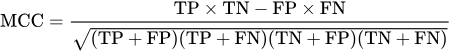




In [539]:
#logistic_regression_evalution(dataset_label, X_data, y_data)
#    parameters: 
#               - dataset_label:- label (eg what data balancing or feature selection technique)
#                - X-data  - the features dataset associated with the passed in dataset_label
#               - y-data  - the target column associated with the passed in dataset_label
#     returns:  
#              - a dictionary of accuracy metrics associated with the dataset_label
def logistic_regression_evalution(dataset_label, X_data, y_data):
    clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter = 50000,
                multi_class='multinomial')
    y_pred = cross_val_predict(clf, X_data, y_data, cv=10)
    #confusion matrix
    print('  ' + dataset_label + " confusion matrix:")
    pretty_print_confusion_matrix(confusion_matrix(y_pred, y_data))
    return compute_accuracy_metrics(y_pred,y_data, dataset_label)


#compute_accuracy_metrics(y_pred,y_test, dataset_label)
#    parameters: 
#                - y_pred  - the predicted labels by the function "logistic_regression_evalution"
#                - y_test - the actual labels associated with the dataset
#                - dataset_label:- label (eg what data balancing or feature selection technique)
#     returns: 
#               - a dictionary of accuracy metrics associated with the dataset_label
    
def compute_accuracy_metrics(y_pred,y_test, dataset_label):
    plot_roc_curve(y_pred,y_test, dataset_label)
    return {dataset_label: {"accuracy":accuracy_score(y_pred, y_test),
                    "recall":recall_score(y_pred,y_test),
                    "f_score":f1_score(y_pred, y_test),
                    "precision": precision_score(y_pred,y_test),
                    "roc_auc_score": roc_auc_score(y_pred,y_test),
                    "matthews_corrcoef": matthews_corrcoef(y_pred,y_test)}}
def plot_roc_curve(y_pred,y_test, dataset_label):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    pyplot.plot(fpr, tpr, marker='.')
    pyplot.title(dataset_label+ ' roc_curve')
    pyplot.show()

In [540]:
# pretty prints a confusion matrix for better viewing
def pretty_print_confusion_matrix(matrix):
    print('     True Negative: {0}'.format(matrix[0][0]))
    print('     False Positive: {0}'.format(matrix[0][1]))
    print('     False Negative: {0}'.format(matrix[1][0]))
    print('     True Positive: {0}'.format(matrix[1][1]))

## 5.2 Getting the superior metrics given a list of dictionary metrics
**In the below function, we comapre different accuracy metircs provided as a list of dictionaries:**
**Get the best scoring data in terms of accuracy, recall, f_score, precision,roc_auc_score,
       or matthews_corrcoef**

In [541]:
#get_best_accuracy_metrics(dictionary_list,label,metric):
# parameters
#     - dictionary_list - a list of data or classifier label and accuracy metrics dictionary
#     - label - a label to identify what metrics were are comnparing eg classifiers, data balancers,
#      or feature selectors
#     - metric - the accuracy metric to compare performance by: accuracy, recall, f_score, precision,roc_auc_score,
#                 or matthews_corrcoef
# returns 
#      - the best dataSet or classifier label in terms of the f1_score metric
def get_best_accuracy_metrics(dictionary_list,label,metric):
    #print the accuracy metrics for each data
    print('  ' + label + "Accuracy Metrics:")
    for dictionary in dictionary_list:
        print("-------")
        print(dictionary)
    #determine the best dataset based on each dataset's the f_scores
    max_f1_score = 0.0
    best_data_set_or_model = ""
    for dictionary in dictionary_list:
        (data_set_type,sub_dict) = list(dictionary.items())[0]
        f_score = sub_dict[metric]
        if f_score > max_f1_score:
            max_f1_score = f_score
            best_data_set_or_model = data_set_type
    print ("----------")       
    print('  '+best_data_set_or_model + ' has the best ' + metric +' score: {0}'.format(max_f1_score))
    return best_data_set_or_model       

## 5.3 A classifier helper function to train and use K-fold validation for each classifier

In [542]:
#classifier_helper(classifier_list,X_best_feature,y_best_feature)
# parameters
#     - classifier_list - a list classifiers label, classifier object tuples
#     - X_best_feature - best features from the data-balancing and feature selection pipeline
#     - y_best_feature - best target column from the data-balancing and feature selection pipeline
# returns 
#      - a dictionary containing the classifier accuracy metrics
def classifier_helper(classifier_list,X_best_feature,y_best_feature):
    classifier_accuracy_metrics = []
    for classifier in classifier_list:
        (classifier_name,clf) = classifier
        y_pred = cross_val_predict(clf, X_best_feature, y_best_feature, cv=10)
        print(classifier_name + " Number of mislabeled points out of a total %d points : %d"% 
                  (y_best_feature.shape[0],(y_best_feature != y_pred).sum()))
        print(classifier_name + "confusion_matrix:")
        print('  '+ classifier_name + "classifier_accuracy_metrics:" )
        pretty_print_confusion_matrix(confusion_matrix(y_best_feature, y_pred))
        classifier_accuracy_metrics.append(compute_accuracy_metrics(y_pred,y_best_feature, classifier_name))
    return classifier_accuracy_metrics